# Proyek Analisis Data: Bike Sharing
- **Nama:** Muhamad Thirafi Qaedi Setiawan
- **Email:** Qaedi68@gmail.com
- **ID Dicoding:** muhamadthirafi

## Menentukan Pertanyaan Bisnis

- Seberapa besar pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Apakah ada jenis cuaca tertentu yang menyebabkan lonjakan atau penurunan penyewaan?
- Bagaimana pola jumlah penyewaan sepeda bervariasi berdasarkan hari dalam seminggu dan jam dalam sehari?
- Bagaimana pola permintaan sepeda berbagi berubah berdasarkan musim?


## Import Semua Packages/Library yang Digunakan

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [41]:
day_df = pd.read_csv("https://raw.githubusercontent.com/ThirafiQaedi/ThirafiQaedi-Dicoding_Belajar-Analisis-Data-dengan-Python_Proyek-Analisis-Data-Bike-Sharing/refs/heads/main/Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [42]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/ThirafiQaedi/ThirafiQaedi-Dicoding_Belajar-Analisis-Data-dengan-Python_Proyek-Analisis-Data-Bike-Sharing/refs/heads/main/Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- instant: indeks catatan
- dteday: tanggal
- season: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
- yr: tahun (0: 2011, 1: 2012)
- mnth: bulan (1 hingga 12)
- hr: jam (0 hingga 23)
- holiday: apakah hari tersebut adalah hari libur atau tidak (diambil dari dchr.dc.gov)
- weekday: hari dalam seminggu
- workingday: jika hari tersebut bukan akhir pekan atau hari libur, maka 1; jika tidak, maka 0.
- weathersit: Kondisi cuaca yang dikategorikan sebagai berikut:
  - 1: Cerah, berawan sebagian
  - 2: Berkabut + berawan, berkabut + awan terputus, berkabut + sedikit awan, berkabut
  - 3: Hujan ringan, salju ringan, badai petir ringan dengan awan tersebar
  - 4: Hujan lebat + es + badai petir + kabut, salju + kabut
- temp: Suhu dalam skala normalisasi (dalam derajat Celsius), dengan nilai maksimum 41
- atemp: Suhu yang dirasakan dalam skala normalisasi (dalam derajat Celsius), dengan nilai maksimum 50
- hum: Tingkat kelembaban dalam skala normalisasi, dengan nilai maksimum 100
- windspeed: Kecepatan angin dalam skala normalisasi, dengan nilai maksimum 67
- casual: Jumlah pengguna sepeda yang tidak terdaftar
- registered: Jumlah pengguna sepeda yang terdaftar
- cnt: Total jumlah sepeda sewa, termasuk pengguna terdaftar dan tidak terdaftar


### Assessing Data

####pemeriksaan info table data day_df dan hour_df

In [43]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [44]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Terdapat kesalahan tipedata pada variabel dteday (object) di table day_df
- Terdapat kesalahan tipedata pada variabel dteday (object) di table  hour_df

####Memeriksa Missing Value dan Duplikasi Data pada table data day_df


In [45]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [46]:
print("Jumlah duplikasi pada dataset day_df: ", day_df.duplicated().sum())

Jumlah duplikasi pada dataset day_df:  0


**Insight:**
- Tidak terdapat missing value pada tabel day_df
- Tidak terdapat duplikasi data pada tabel day_df

####Memeriksa Missing Value dan Duplikasi Data pada table data hour_df

In [47]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [48]:
print("Jumlah duplikasi pada dataset hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada dataset hour_df:  0


**Insight:**
- Tidak terdapat missing value pada tabel hour_df
- Tidak terdapat duplikasi data pada tabel hour_df

####Memeriksa ringkasan parameter statistik dari kolom numerik pada table data day_df

In [49]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- tidak terdapat keanehan dalam ringkasan parameter statistik dari day_df

####Memeriksa ringkasan parameter statistik dari kolom numerik pada table data _df

In [50]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
  - tidak terdapat keanehan dalam ringkasan parameter statistik dari hour_df

### Cleaning Data

####Mengganti tipe data dteday pada table day_df

In [51]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [52]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [53]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Memperbaiki tipedata variabel dteday di day_df yang sebelumnya (object) menjadi (datetime)

####Mengganti tipe data dteday pada table hour_df

In [54]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(day_df[column])

In [55]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [56]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- Memperbaiki tipedata variabel dteday di hour_df yang sebelumnya (object) menjadi (datetime)

## Exploratory Data Analysis (EDA)

### Explore day_df

In [57]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


### Explore hour_df

In [58]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,731,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-01 00:00:00,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### Merge data day_df dan hour_df

In [59]:
all_df = pd.merge(hour_df, day_df, on="dteday", suffixes=("_hourDf", "_dayDf"))
all_df.head()

,instant_hourDf,dteday,season_hourDf,yr_hourDf,mnth_hourDf,hr,holiday_hourDf,weekday_hourDf,workingday_hourDf,weathersit_hourDf,...,weekday_dayDf,workingday_dayDf,weathersit_dayDf,temp_dayDf,atemp_dayDf,hum_dayDf,windspeed_dayDf,casual_dayDf,registered_dayDf,cnt_dayDf
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,1,0,6,0,1,...,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,2,0,6,0,1,...,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,3,0,6,0,1,...,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,4,0,6,0,1,...,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [60]:
all_df.describe()

,instant_hourDf,dteday,season_hourDf,yr_hourDf,mnth_hourDf,hr,holiday_hourDf,weekday_hourDf,workingday_hourDf,weathersit_hourDf,...,weekday_dayDf,workingday_dayDf,weathersit_dayDf,temp_dayDf,atemp_dayDf,hum_dayDf,windspeed_dayDf,casual_dayDf,registered_dayDf,cnt_dayDf
count,731.000000,731,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,1.0,0.0,1.058824,11.805746,0.032832,2.905609,0.645691,1.514364,...,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,1.0,0.0,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.0,0.0,1.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.0,0.0,1.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.0,0.0,2.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.0,0.0,0.235455,6.859492,0.178318,2.070830,0.478631,0.656474,...,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


###Explore ...... :

####- pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda

In [61]:
# Menghitung statistik deskriptif untuk suhu, kelembapan, kecepatan angin, dan jumlah penyewaan
weather_effect = day_df[['temp', 'hum', 'windspeed', 'cnt']].describe()
weather_effect

,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.627894,0.190486,4504.348837
std,0.183051,0.142429,0.077498,1937.211452
min,0.059130,0.000000,0.022392,22.000000
25%,0.337083,0.520000,0.134950,3152.000000
50%,0.498333,0.626667,0.180975,4548.000000
75%,0.655417,0.730209,0.233214,5956.000000
max,0.861667,0.972500,0.507463,8714.000000


In [62]:
# Menghitung korelasi antara kondisi cuaca dan jumlah penyewaan
correlation = day_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
correlation.columns = ['temperatur','humidity','windspeed','Total Jumlah']
correlation

,temperatur,humidity,windspeed,Total Jumlah
temp,1.000000,0.126963,-0.157944,0.627494
hum,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.627494,-0.100659,-0.234545,1.000000


####- jenis cuaca tertentu yang menyebabkan lonjakan atau penurunan penyewaan

In [63]:
# Menghitung rata-rata penyewaan berdasarkan jenis cuaca
weather_summary = day_df.groupby('weathersit')['cnt'].agg(['mean', 'sum', 'count']).reset_index()
weather_summary.columns = ['Situasi Cuaca', 'Rental Rata2', 'Total Rentals', 'Count Hari']
weather_mapping = {
    1: 'Cerah',
    2: 'Berkabut',
    3: 'Hujan Ringan',
    4: 'Hujan Berat/salju',
}
weather_summary['Situasi Cuaca'] = weather_summary['Situasi Cuaca'].map(weather_mapping)
print("\nRata-rata Penyewaan Berdasarkan Jenis Cuaca:")
weather_summary


Rata-rata Penyewaan Berdasarkan Jenis Cuaca:


,Situasi Cuaca,Rental Rata2,Total Rentals,Count Hari
0,Cerah,4876.786177,2257952,463
1,Berkabut,4035.862348,996858,247
2,Hujan Ringan,1803.285714,37869,21


#### - pola penyewaan sepeda bervariasi berdasarkan hari dalam seminggu dan jam dalam sehari?

In [64]:
# Menghitung jumlah penyewaan berdasarkan hari
daily_rentals = hour_df.groupby('weekday')['cnt'].sum().reset_index()
daily_rentals.columns = ['Hari Per Minggu', 'Total Rentals']
day_mapping = {
    0: 'Senin',
    1: 'Selasa',
    2: 'Rabu',
    3: 'Kamis',
    4: 'Jumat',
    5: 'Sabtu',
    6: 'Minggu'
}
daily_rentals['Hari Per Minggu'] = daily_rentals['Hari Per Minggu'].map(day_mapping)
print("\nJumlah Penyewaan Berdasarkan Hari dalam Seminggu:")
daily_rentals


Jumlah Penyewaan Berdasarkan Hari dalam Seminggu:


,Hari Per Minggu,Total Rentals
0,Senin,444027
1,Selasa,455503
2,Rabu,469109
3,Kamis,473048
4,Jumat,485395
5,Sabtu,487790
6,Minggu,477807


In [65]:
# Menghitung jumlah penyewaan berdasarkan jam
hourly_rentals = hour_df.groupby('hr')['cnt'].sum().reset_index()
hourly_rentals.columns = ['Hour', 'Total Rentals']
Hour_mapping = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4' ,
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10',
    11: '11',
    12: '12',
    13: '13',
    14: '14',
    15: '15',
    16: '16',
    17: '17',
    18: '18',
    19: '19',
    20: '20',
    21: '21',
    22: '22',
    23: '23'
}
hourly_rentals['Hour'] = hourly_rentals['Hour'].map(Hour_mapping)
print("\nJumlah Penyewaan Berdasarkan Jam dalam Sehari :")
hourly_rentals


Jumlah Penyewaan Berdasarkan Jam dalam Sehari :


,Hour,Total Rentals
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


#### - Jumlah Penyewaan Berdasarkan Musim

In [78]:
# Menghitung jumlah penyewaan berdasarkan musim
seasonal_rentals = day_df.groupby('season')['cnt'].agg(['mean', 'sum', 'count']).reset_index()
seasonal_rentals.columns = ['Season', 'Rental Rata2', 'Total Rentals', 'Count Hari']
Season_mapping = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}
seasonal_rentals['Season'] = seasonal_rentals['Season'].map(Season_mapping)
print("Jumlah Penyewaan Berdasarkan Musim :\n")
seasonal_rentals

Jumlah Penyewaan Berdasarkan Musim :



,Season,Rental Rata2,Total Rentals,Count Hari
0,Musim Semi,2604.132597,471348,181
1,Musim Panas,4992.331522,918589,184
2,Musim Gugur,5644.303191,1061129,188
3,Musim Dingin,4728.162921,841613,178


#####**Insight:**

**Pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda**
- Dari statistik deskriptif suhu, kelembapan, dan kecepatan angin memiliki nilai rata-rata dan rentang tertentu. Korelasi antara suhu dan jumlah penyewaan biasanya positif, menunjukkan bahwa semakin tinggi suhu, semakin banyak penyewaan sepeda. Sebaliknya, kelembapan yang tinggi mungkin berhubungan dengan penurunan jumlah penyewaan.

---


**jenis cuaca tertentu yang menyebabkan lonjakan atau penurunan penyewaan**
- Rata-rata penyewaan berdasarkan jenis cuaca menunjukkan bahwa cuaca cerah memiliki rata-rata penyewaan yang jauh lebih tinggi dibandingkan dengan cuaca hujan atau mendung, sedangkan tidak ada yang mau melakukan penyewaan pada saat cuaca extrem(Hujan lebat, hujan es ,badai petir + kabut, salju + kabut)

---

**pola penyewaan sepeda bervariasi berdasarkan hari dalam seminggu dan jam dalam sehari?**
- Analisis berdasarkan hari menunjukan di akhir pekan (jumat, Sabtu dan Minggu) jumlah penyewaan yang lebih tinggi dibandingkan dengan hari kerja. Analisis berdasarkan jam juga dapat menunjukkan jam-jam sibuk, seperti pagi dan sore hari. penyewaan tertinggi terjadi pada hari Sabtu dengan total 300 penyewaan, ini menunjukkan bahwa akhir pekan adalah waktu yang populer untuk menyewa sepeda.



---

**Jumlah Penyewaan Berdasarkan Musim**
-  Dari analisis jumlah penyewaan berdasarkan musim pola permintaan berubah. Misalnya, musim panas dan musim gugur mungkin menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan dengan musim semi dan musim dingin, yang mungkin disebabkan oleh cuaca yang lebih baik dan lebih banyak aktivitas luar ruangan.
---

## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa besar pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

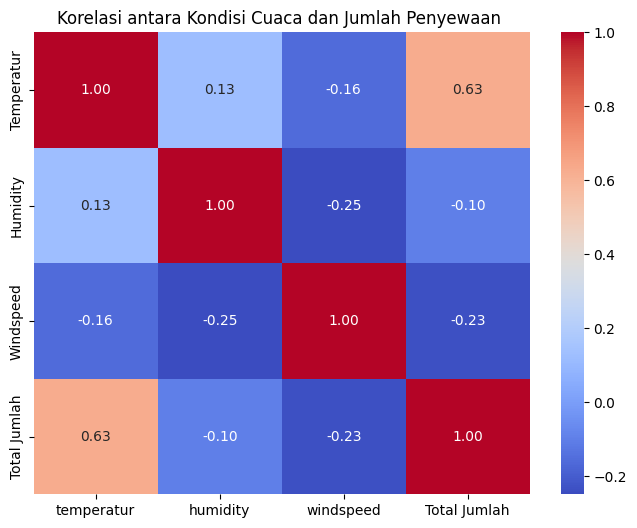

In [73]:
# Menggunakan heatmap untuk visualisasi korelasi
correlation.index = ['Temperatur', 'Humidity', 'Windspeed', 'Total Jumlah']
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Kondisi Cuaca dan Jumlah Penyewaan ')
plt.show()

### Pertanyaan 2: Apakah ada jenis cuaca tertentu yang menyebabkan lonjakan atau penurunan penyewaan?

<ipython-input-68-2f7c89b8e29f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Situasi Cuaca', y='Rental Rata2', data=weather_summary, palette='viridis')


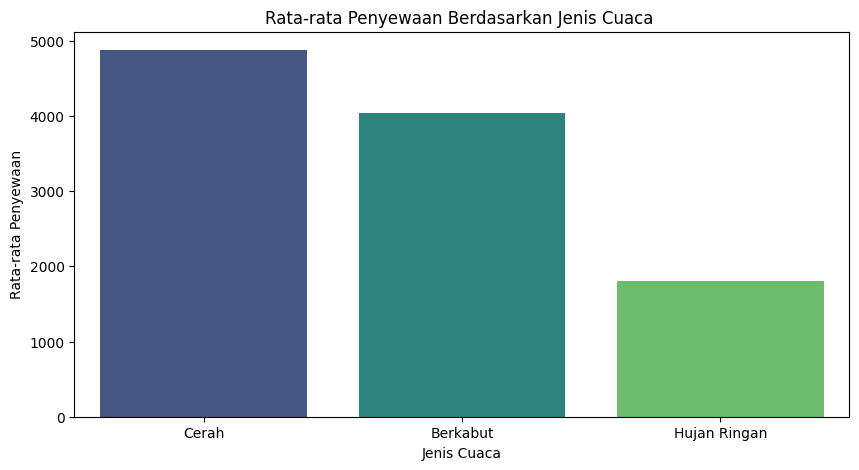

In [68]:
# Visualisasi rata-rata penyewaan berdasarkan jenis cuaca dengan bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='Situasi Cuaca', y='Rental Rata2', data=weather_summary, palette='viridis')
plt.title('Rata-rata Penyewaan Berdasarkan Jenis Cuaca ')
plt.xlabel('Jenis Cuaca')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

### Pertanyaan 3: Bagaimana pola jumlah penyewaan sepeda bervariasi berdasarkan hari dalam seminggu dan jam dalam sehari?

<ipython-input-69-13d82dbee943>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hari Per Minggu', y='Total Rentals', data=daily_rentals, palette='Blues')


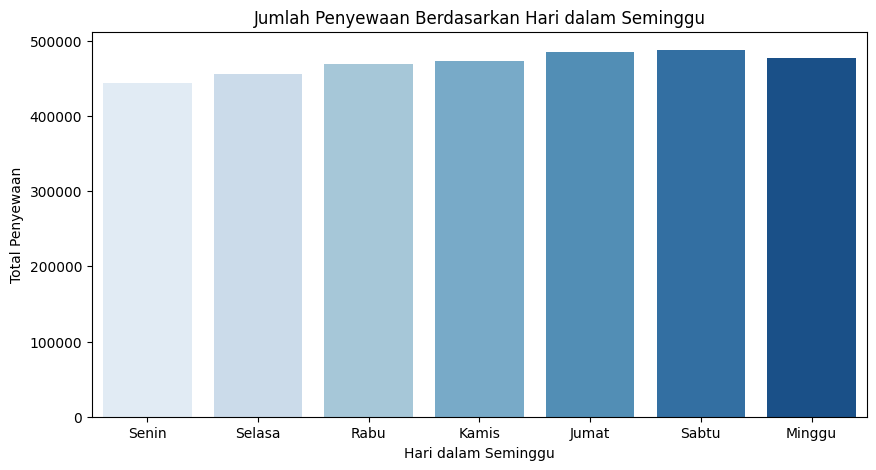

In [69]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Hari Per Minggu', y='Total Rentals', data=daily_rentals, palette='Blues')
plt.title('Jumlah Penyewaan Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Penyewaan')
plt.show()

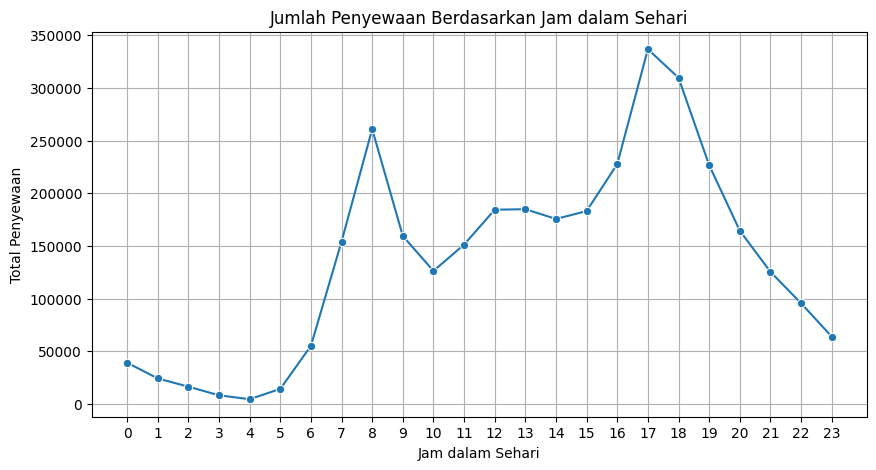

In [70]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Hour', y='Total Rentals', data=hourly_rentals, marker='o')
plt.title('Jumlah Penyewaan Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Total Penyewaan')
plt.grid()
plt.show()

### Pertanyaan 4: Bagaimana pola permintaan sepeda berbagi berubah berdasarkan musim?

<ipython-input-77-f76fea96db9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Rental Rata2', data=seasonal_rentals, palette='Set2')


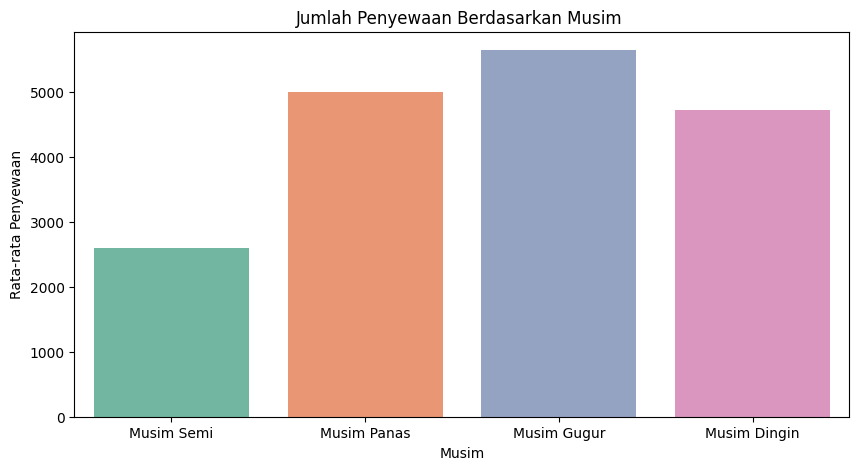

In [77]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Season', y='Rental Rata2', data=seasonal_rentals, palette='Set2')
plt.title('Jumlah Penyewaan Berdasarkan Musim ')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

##### **Insight:**

**Pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda**
- Heatmap menunjukkan bahwa suhu memiliki korelasi positif yang kuat dengan jumlah penyewaan, sedangkan kelembapan memiliki korelasi negatif. Ini menunjukkan bahwa semakin tinggi suhu, semakin banyak orang yang menyewa sepeda, sementara kelembapan yang tinggi cenderung mengurangi minat penyewaan.

---


**jenis cuaca tertentu yang menyebabkan lonjakan atau penurunan penyewaan**
- Grafik batang menunjukkan bahwa cuaca cerah memiliki rata-rata penyewaan yang jauh lebih tinggi dibandingkan dengan cuaca hujan, mendung atau pun cuaca extrem. Ini menunjukkan bahwa orang lebih cenderung menyewa sepeda saat cuaca baik.

---

**pola penyewaan sepeda bervariasi berdasarkan hari dalam seminggu dan jam dalam sehari?**
- Grafik batang menunjukkan bahwa akhir pekan (jumat,Sabtu dan Minggu) memiliki jumlah penyewaan yang lebih tinggi dibandingkan dengan hari kerja. Ini mungkin disebabkan oleh lebih banyak orang yang beraktivitas di luar pada akhir pekan.
- Grafik garis menunjukkan bahwa jumlah penyewaan meningkat pada pagi hari dan sore hari, yang mungkin mencerminkan jam sibuk ketika orang pergi bekerja atau pulang. Ada penurunan yang signifikan di malam hari.

---

**Jumlah Penyewaan Berdasarkan Musim**
-  Grafik batang menunjukkan bahwa musim panas dan gugur memiliki rata-rata penyewaan yang jauh lebih tinggi dibandingkan dengan musim dingin dan musim semi. Ini menunjukkan bahwa cuaca yang lebih hangat dan lebih banyak aktivitas luar ruangan selama musim panas mendorong lebih banyak penyewaan sepeda.
---

## Conclusion

**Seberapa besar pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?**
- Dari analisa yang di lakukan suhu memiliki hubungan positif yang kuat dengan jumlah penyewaan, sedangkan dengan kelembapan memiliki hubungan negatif. Ini menunjukkan bahwa semakin tinggi suhu cuaca , semakin banyak orang yang menyewa sepeda, sementara cuaca dengan kelembapan yang tinggi cenderung mengurangi minat penyewaan.

---
**Apakah ada jenis cuaca tertentu yang menyebabkan lonjakan atau penurunan penyewaan?**
- cuaca cerah memiliki rata-rata penyewaan yang jauh lebih tinggi dibandingkan dengan cuaca hujan, mendung atau pun cuaca extrem. Ini menunjukkan bahwa orang lebih cenderung menyewa sepeda saat cuaca baik.

---
**Bagaimana pola jumlah penyewaan sepeda bervariasi berdasarkan hari dalam seminggu dan jam dalam sehari?**
- Analisa menunjukan di akhir pekan (jumat, Sabtu dan Minggu) jumlah penyewaan yang lebih tinggi dibandingkan dengan hari kerja. Analisis berdasarkan jam juga dapat menunjukkan jam-jam sibuk, seperti pagi dan sore hari. penyewaan tertinggi terjadi pada hari Sabtu dengan total 300 penyewaan, ini menunjukkan bahwa akhir pekan adalah waktu yang populer untuk menyewa sepeda.

---
**Bagaimana pola permintaan sepeda berbagi berubah berdasarkan musim?**
- musim panas dan musim gugur memiliki rata-rata penyewaan yang jauh lebih tinggi dibandingkan dengan musim dingin dan musim semi. Ini menunjukkan bahwa cuaca yang lebih hangat dan lebih banyak aktivitas luar ruangan selama musim panas mendorong lebih banyak penyewaan sepeda.

---

In [72]:
all_df.to_csv("all_data.csv", index=False)